In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load your dataset (replace with your actual data loading method)
df = pd.read_csv('/content/pooja.csv')

# Basic preprocessing steps:

# 1. Handle missing values - fill with median for numerical, mode for categorical
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# 2. Remove duplicates
df.drop_duplicates(inplace=True)

# 3. Encode categorical features (if any) using Label Encoding
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 4. Separate features and target
# Assuming 'kyc_verified' is the target variable. Please change if it's different.
target_column = 'kyc_verified'
X = df.drop(columns=[target_column])
y = df[target_column]

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Initialize and train Random Forest classifier with class weight for imbalance
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# 8. Predict and evaluate
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.843
Confusion Matrix:
 [[ 10 148]
 [  9 833]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.06      0.11       158
           1       0.85      0.99      0.91       842

    accuracy                           0.84      1000
   macro avg       0.69      0.53      0.51      1000
weighted avg       0.80      0.84      0.79      1000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE

# Assuming 'df' is your DataFrame and 'label' is your target column
df = pd.read_csv('/content/pooja.csv')
# 1. Handle missing values
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

# 2. Remove duplicates
df.drop_duplicates(inplace=True)

# 3. Encode categorical features
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 4. Separate features and target
# Change 'label' to 'kyc_verified' as per the available data
X = df.drop(columns=['kyc_verified'])
y = df['kyc_verified']

# 5. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 6. Split to train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Apply SMOTE to balance classes in training set only
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 8. Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_bal, y_train_bal)

# 9. Predict and evaluate
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.79
Confusion Matrix:
 [[ 32 126]
 [ 84 758]]
Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.20      0.23       158
           1       0.86      0.90      0.88       842

    accuracy                           0.79      1000
   macro avg       0.57      0.55      0.56      1000
weighted avg       0.77      0.79      0.78      1000



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import xgboost as xgb

df = pd.read_csv('/content/pooja.csv')
# 1. Basic Preprocessing
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())
df.drop_duplicates(inplace=True)
categorical_cols = df.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# 2. Feature & Target
# Corrected target column from 'label' to 'kyc_verified'
X = df.drop(columns=['kyc_verified'])
y = df['kyc_verified']

# 3. Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Apply SMOTE on train set
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

# 6. XGBoost Classifier with Hyperparameter Tuning
params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'scale_pos_weight': [1, 2, 5, 10]    # Important for imbalance
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
search = RandomizedSearchCV(xgb_clf, params, scoring='recall', n_iter=15, cv=3, verbose=1, n_jobs=-1)
search.fit(X_train_bal, y_train_bal)
best_xgb = search.best_estimator_

# 7. Predict & Evaluate
y_pred = best_xgb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Accuracy: 0.842
Confusion Matrix:
 [[  0 158]
 [  0 842]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       158
           1       0.84      1.00      0.91       842

    accuracy                           0.84      1000
   macro avg       0.42      0.50      0.46      1000
weighted avg       0.71      0.84      0.77      1000



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [15:34:40] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being s

Dataset shape: (5000, 8)
Columns: ['transaction_id', 'customer_id', 'kyc_verified', 'account_age_days', 'transaction_amount', 'channel', 'timestamp', 'is_fraud']
  transaction_id customer_id kyc_verified  account_age_days  \
0     TXN_200000    CUST_799          Yes              1050   
1     TXN_200001    CUST_484          Yes               295   
2     TXN_200002    CUST_791          Yes              2083   
3     TXN_200003    CUST_664          Yes              2789   
4     TXN_200004    CUST_157          Yes               694   

   transaction_amount channel            timestamp  is_fraud  
0              256369  Mobile  2025-08-12 02:10:24         0  
1                6581  Mobile  2025-08-25 01:14:31         0  
2                4492  Mobile  2025-08-17 12:12:40         0  
3              275413     POS  2025-08-07 06:23:54         0  
4               98098     POS  2025-08-20 21:55:54         0  
Fraud rate: 8.64%

Data types:
 transaction_id        object
customer_id         

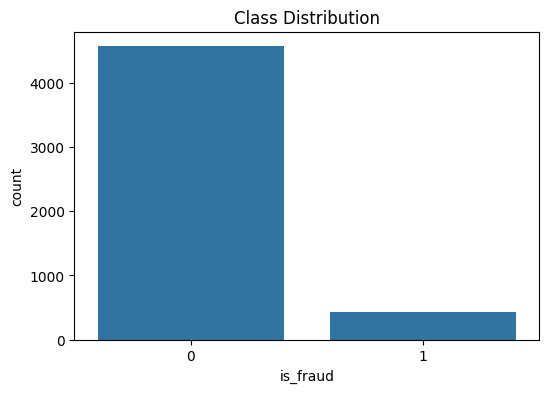

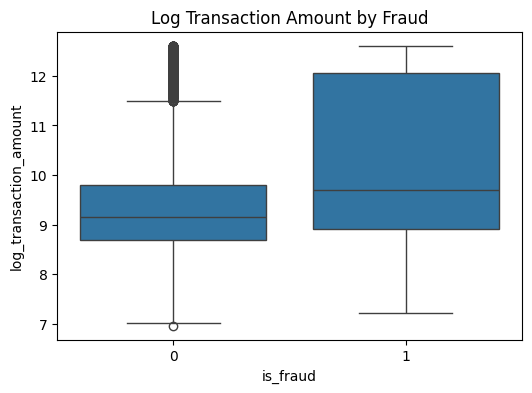

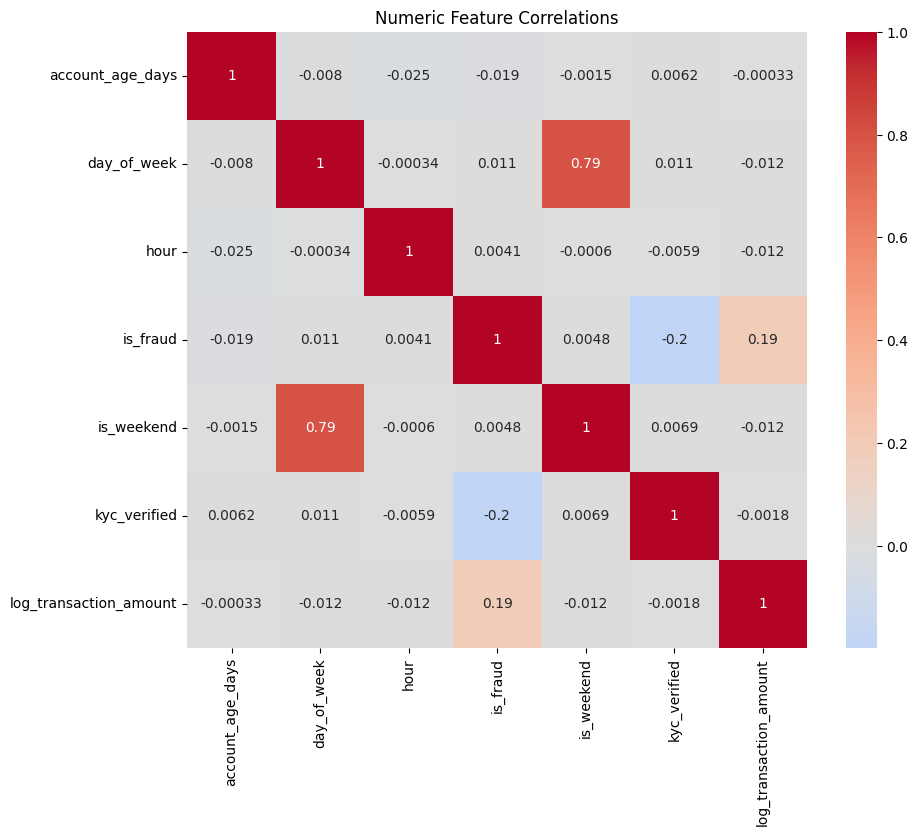


Resampled train shape: (7308, 9), Fraud rate: 50.00%

=== Evaluation ===
AUC-ROC: 0.6871

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       914
           1       0.26      0.21      0.23        86

    accuracy                           0.88      1000
   macro avg       0.59      0.58      0.58      1000
weighted avg       0.87      0.88      0.88      1000


Confusion Matrix:
 [[863  51]
 [ 68  18]]


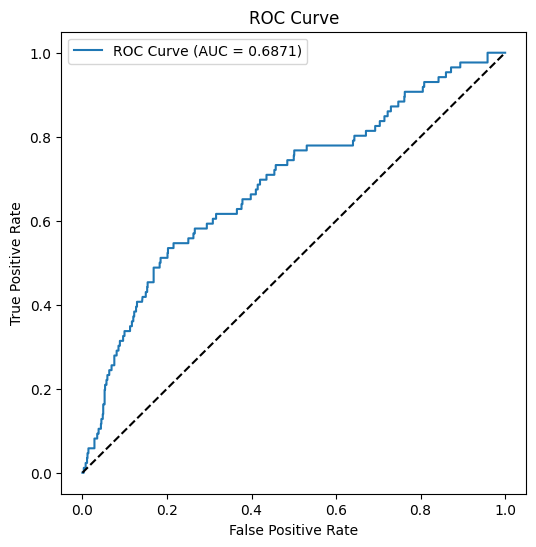

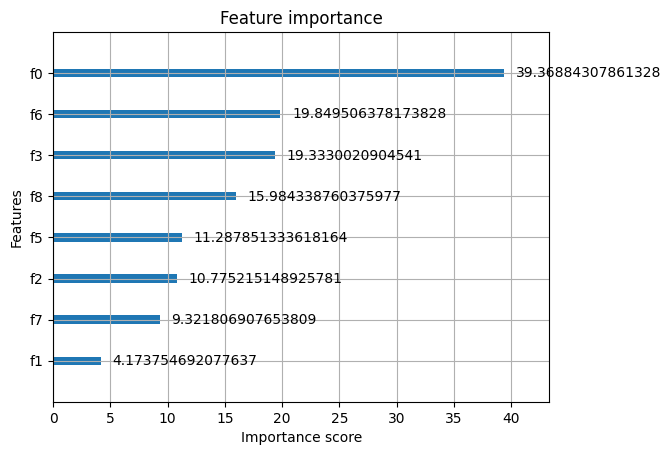


Model and preprocessor saved as 'fraud_model.pkl' and 'preprocessor.pkl'


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve
from imblearn.over_sampling import SMOTE  # For handling imbalance
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load Your Dataset
# Replace 'your_fraud_data.csv' with your actual file path
df = pd.read_csv('/content/pooja.csv')  # e.g., 'fraud_dataset.csv'

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(df.head())  # Preview first 5 rows

# Basic info
print(f"Fraud rate: {df['is_fraud'].mean():.2%}")
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Step 2: Feature Engineering and Preprocessing
# Drop non-predictive IDs
df = df.drop(['transaction_id', 'customer_id'], axis=1, errors='ignore')

# Handle timestamp: Convert to datetime and extract features
df['timestamp'] = pd.to_datetime(df['timestamp'], errors='coerce')
df['hour'] = df['timestamp'].dt.hour
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['is_weekend'] = (df['day_of_week'] >= 5).astype(int)
df = df.drop('timestamp', axis=1)  # Drop original after extraction

# Handle kyc_verified: Encode to 0/1 (handles bool, int, or string like 'Yes'/'No')
if df['kyc_verified'].dtype == 'bool':
    df['kyc_verified'] = df['kyc_verified'].astype(int)
else:
    le = LabelEncoder()
    df['kyc_verified'] = le.fit_transform(df['kyc_verified'].astype(str))

# Handle transaction_amount: Log transform if skewed (common for amounts)
df['log_transaction_amount'] = np.log1p(df['transaction_amount'])  # log(1 + x) for zeros
df = df.drop('transaction_amount', axis=1)  # Use log version

# Now columns: kyc_verified, account_age_days, channel, hour, day_of_week, is_weekend, log_transaction_amount, is_fraud

# Step 3: Exploratory Data Analysis (EDA) Basics
print("\n=== EDA ===")
print(df.describe(include='all'))

# Visualize imbalance
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_fraud')
plt.title('Class Distribution')
plt.show()

# Box plot for log_amount by fraud
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='is_fraud', y='log_transaction_amount')
plt.title('Log Transaction Amount by Fraud')
plt.show()

# Correlation heatmap (numeric features)
numeric_cols = df.select_dtypes(include=['number']).columns.drop('is_fraud')  # Exclude target
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_cols.union(['is_fraud'])].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Numeric Feature Correlations')
plt.show()

# Step 4: Prepare Features and Target
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Identify categorical and numerical columns
cat_cols = ['channel']  # Only channel is categorical now
num_cols = [col for col in X.columns if col not in cat_cols]

# Preprocessing pipeline: One-hot for cat, scale for num
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), cat_cols)
    ])

# Train-test split (stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply preprocessing
X_train_prep = preprocessor.fit_transform(X_train)
X_test_prep = preprocessor.transform(X_test)

# Handle imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_prep, y_train)
print(f"\nResampled train shape: {X_train_res.shape}, Fraud rate: {y_train_res.mean():.2%}")

# Alternative: Use original with class weights (comment out SMOTE and use below in model)
# imbalance_ratio = (y_train == 0).sum() / (y_train == 1).sum()

# Step 5: Model Training (XGBoost - Recommended)
model = xgb.XGBClassifier(
    # scale_pos_weight=imbalance_ratio,  # Uncomment if using original data (no SMOTE)
    eval_metric='auc',
    random_state=42,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1
)

# Train on resampled data
model.fit(X_train_res, y_train_res)

# Step 6: Predictions and Evaluation
y_pred = model.predict(X_test_prep)
y_prob = model.predict_proba(X_test_prep)[:, 1]

# Metrics
auc = roc_auc_score(y_test, y_prob)
print(f"\n=== Evaluation ===")
print(f"AUC-ROC: {auc:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Feature Importance (note: after one-hot, channel features are prefixed)
feature_names = num_cols + list(preprocessor.named_transformers_['cat'].get_feature_names_out(cat_cols))
xgb.plot_importance(model, max_num_features=10, importance_type='gain')
plt.show()  # Plot uses model internals; for labels, use pd.Series(model.feature_importances_, index=feature_names).plot()

# Step 7: Save Model and Preprocessor (Optional)
import joblib
joblib.dump(model, 'fraud_model.pkl')
joblib.dump(preprocessor, 'preprocessor.pkl')
print("\nModel and preprocessor saved as 'fraud_model.pkl' and 'preprocessor.pkl'")

# To load and predict on new data:
# loaded_model = joblib.load('fraud_model.pkl')
# loaded_preproc = joblib.load('preprocessor.pkl')
# new_X_prep = loaded_preproc.transform(new_X)
# preds = loaded_model.predict(new_X_prep)